# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

* catboost.__version__ == 1.1.1
* matplotlib.__version__ == 3.5.3
* sklearn.__version__ == 0.21.0
* pandas.__version__ == 1.3.1
* numpy.__version__ == 1.19.5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedKFold
from category_encoders import CatBoostEncoder


from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.utils import shuffle

from copy import deepcopy

from tqdm import tqdm, notebook
from joblib import Parallel, delayed
from collections import ChainMap

In [2]:
data = pd.read_csv('./train.csv')
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [5]:
sorted(data.TotalSpent.unique())[:5]

[' ', '100.2', '100.25', '100.35', '100.4']

* Необходимо избавиться от ' ' заменив их на np.nan и задать тип float для численной переменной

In [6]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: np.nan if x == ' ' else np.float(x))
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

In [7]:
train, valid = train_test_split(data, test_size=0.25, random_state=42)
train, valid = train.reset_index(drop=True), valid.reset_index(drop=True)

print(train.shape, valid.shape)

(3961, 20) (1321, 20)


In [8]:
### Предобработчик признаков

class SentColumns(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns: list=None) -> None:
        self.columns = columns
    
    def fit(self, X:pd.DataFrame=None, y:pd.DataFrame=None):
        return self

    def transform(self, X:pd.DataFrame=None)->pd.DataFrame:
        df_x = pd.DataFrame(X)
        df_x.columns = self.columns
        return df_x
    
def base_pipe(num_columns:list=None, cat_columns:list=None, fill_value:float=-1e24)->object:

    # создаем конвейер для количественных переменных
    num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = fill_value))
    ])

    # создаем конвейер для категориальных переменных
    cat_pipe = Pipeline([
        ('catenc', CatBoostEncoder(cols=cat_columns))
    ])

    transformers = [('num', num_pipe, num_columns),
                    ('cat', cat_pipe, cat_columns)]

    # передаем список трансформеров в ColumnTransformer
    transformer = ColumnTransformer(transformers=transformers)

    # задаем итоговый конвейер
    prep_pipe = Pipeline([
        ('transform', transformer),
        ('sent_columns', SentColumns(columns=num_columns+cat_columns))
    ])  

    return prep_pipe

In [9]:
## Корреляционный анализ

def _get_f_metric(df):     

    try:    
        return (2*roc_auc_score(df.iloc[:,0],df.iloc[:,1])-1)*100

    except:
        return 0 

def _get_features_metric(df:pd.DataFrame):      

    return {f: _get_f_metric(df[[df.columns[0],f]]) for f in list(df.columns[1:])}

def corr_analysis(df:pd.DataFrame,
                  target:str,
                  method:str='spearman', 
                  threshold: float=0.8, 
                  drop_with_most_correlations: bool=True):

    df_train = deepcopy(df)

    features = list(df_train.drop(columns=target).columns)

    samples = {name: sample for name, sample in {'metric': df_train}.items() if not sample.empty} if df_train is not None else None

    metrics = {name: _get_features_metric(df_train[[target] + [f for f in features if f in df_train.columns]]) for name, df_train in samples.items()}

    metric_res = pd.DataFrame(metrics).round(4).abs().sort_values('metric', ascending=False)

    correlations = df_train[features].corr(method=method).abs()
    to_check_correlation=True
    features_to_drop = {}


    while to_check_correlation:
        to_check_correlation=False
        corr_number = {}
        significantly_correlated = {}

        for var in correlations:
            var_corr = correlations[var]
            var_corr = var_corr[(var_corr.index != var) & (var_corr > threshold)].sort_values(ascending=False).copy()
            corr_number[var] = var_corr.shape[0]
            significantly_correlated[var] = str(var_corr.index.tolist())

        if drop_with_most_correlations:
            with_correlation = {x: metric_res['metric'][x] for x in corr_number
                                if corr_number[x] == max([corr_number[x] for x in corr_number])
                                and corr_number[x] > 0}
        else:
            with_correlation = {x: metric_res['metric'][x] for x in corr_number if corr_number[x] > 0}

        if len(with_correlation)>0:
            feature_to_drop = min(with_correlation, key=with_correlation.get)
            features_to_drop[feature_to_drop] = significantly_correlated[feature_to_drop]
            correlations = correlations.drop(feature_to_drop, axis=1).drop(feature_to_drop, axis=0).copy()

            to_check_correlation = True

        feat_after_corr = list(set(features) - set(features_to_drop))

    corr_df = pd.DataFrame(features_to_drop.values(), features_to_drop.keys()).rename(columns={0: f'Корреляция более {threshold*100}%'})
    print(f'Количество факторов после корреляционного анализа: {len(feat_after_corr)}')
    display(corr_df)
    return feat_after_corr

In [10]:
data_prepared = base_pipe(num_columns=num_cols,cat_columns=cat_cols).fit_transform(train,train[target_col])
data_prepared[target_col] = train[target_col]

feats_after_corr= corr_analysis(df=data_prepared,target=target_col,method='spearman',threshold=0.9,drop_with_most_correlations=True)

Количество факторов после корреляционного анализа: 19


""


In [11]:
def depth_analysis(df:pd.DataFrame=None,
                   target:str=None,
                   features:list=None,
                   max_depth:int=5):

    df_train = deepcopy(df)
    print(df_train.shape)

    max_depth_grid = list(range(1,max_depth+1))
    fi = list()

    rank_df = pd.DataFrame(features,columns=['index']).set_index(['index'])

    for max_depth in notebook.tqdm(max_depth_grid):

        fi_feat = []
        params = {'iterations':1500,
                  'loss_function':'Logloss',
                  'thread_count':-1,
                  'random_state':42,
                  'verbose':0
                 }
        
        params['depth'] = max_depth

        model = CatBoostClassifier(**params)
        model.fit(df_train[features], df_train[target])

        fi.append(model.get_feature_importance())
        fi_feat.append(model.get_feature_importance())

        rank = pd.DataFrame(np.array(fi_feat).T,
                          columns=['importance'],
                          index=features).sort_values('importance', ascending=True)

    fi = pd.DataFrame(np.array(fi).T,
              columns=['importance_depth_' + str(idx) for idx in range(1,len(fi)+1)],
              index=features)

    # вычисляем усредненные важности и добавляем столбец с ними
    fi['mean_importance'] = fi.mean(axis=1)
    
    deth_features_importance = fi[fi.mean_importance>0].index.tolist()
    fi = fi.sort_values('mean_importance',ascending=False)

    print(f'Количество признаков после mean importance относительно глубины: {len(deth_features_importance)}')
    display(fi)
    return deth_features_importance

In [12]:
feats_after_depth = depth_analysis(df=data_prepared,
                                  target=target_col,
                                  features=feats_after_corr,
                                  max_depth=3)

(3961, 20)


  0%|          | 0/3 [00:00<?, ?it/s]

Количество признаков после mean importance относительно глубины: 19


,importance_depth_1,importance_depth_2,importance_depth_3,mean_importance
HasContractPhone,38.592262,26.642884,20.262445,28.499197
ClientPeriod,17.433890,18.030015,15.571824,17.011909
HasInternetService,10.325431,9.282373,8.630344,9.412716
HasOnlineSecurityService,9.726855,6.757673,4.971877,7.152135
MonthlySpending,3.757834,7.318249,7.561161,6.212415
HasTechSupportAccess,7.121927,5.639371,5.154548,5.971949
PaymentMethod,4.392368,3.893392,4.306501,4.197420
IsBillingPaperless,2.210840,3.983117,4.446412,3.546790
TotalSpent,0.991969,3.461165,5.370863,3.274666
Sex,1.241695,2.217280,3.584972,2.347982


In [13]:
del data_prepared

In [14]:
def _preprocessing(X_tr: pd.DataFrame=None, 
                   y_tr: pd.DataFrame=None, 
                   X_te: pd.DataFrame = None,
                   num_columns: list=None, 
                   cat_columns: list=None):

    X_tr.reset_index(drop=True,inplace=True)
    y_tr.reset_index(drop=True,inplace=True)

    prep_pipe = base_pipe(num_columns=num_columns,
                          cat_columns=cat_columns)

    prep_pipe.fit(X_tr, y_tr)

    X_tr = prep_pipe.transform(X_tr)

    if X_te is None:
        return X_tr
    else:

        X_te.reset_index(drop=True,inplace=True)
        X_te = prep_pipe.transform(X_te)

        return X_tr, X_te

def _permute(col, 
             model: object, 
             X: pd.DataFrame, 
             y: pd.DataFrame, 
             n_iter: int, 
             metric=None, 
             higher_is_better: bool=True, 
             random_state: int=None):

    d = {col: []}      
    base_score = metric(y, model.predict_proba(X)[:, 1])

    for _ in range(n_iter):
        X[col] = shuffle(X[col].values, random_state=random_state)
        temp_prediction = model.predict_proba(X)[:, 1]
        score = metric(y.values, temp_prediction)

        if higher_is_better:
            d[col].append(base_score-score)
        else:
            d[col].append(base_score+score)

    return d

def _custom_permute(model: object, 
                    X: pd.DataFrame, 
                    y: pd.DataFrame,
                    metric=None, 
                    n_iter: int=5, 
                    n_jobs: int=-1, 
                    higher_is_better: bool=True, 
                    random_state: int=None):  


    result = Parallel(n_jobs=n_jobs,max_nbytes='50M')(delayed(_permute)(col, model, X, y, 
                                                      n_iter, metric, higher_is_better, random_state) for col in tqdm(X.columns.tolist()))


    dict_imp = dict(ChainMap(*result))

    for i in dict_imp.keys(): dict_imp[i] = np.mean(dict_imp[i])

    return dict_imp

    
def permutation_analysis(df:pd.DataFrame,
                         num_columns:list=None,
                         cat_columns:list=None,
                         target:str=None,
                         test_size:float=0.3,
                         n_iter_permute:int=5, 
                         n_jobs: int=-1, 
                         metric=None, 
                         higher_is_better: bool=True):

    features = num_columns+cat_columns
    df_train = deepcopy(df).reset_index(drop=True)
    nans_share = df_train[num_columns+cat_columns].isna().mean().values.mean()
    df_train_perm, df_test_perm = train_test_split(df_train,test_size=test_size,random_state=42)

    print(f'Размер обучающего подмножества для Permutation importance: {df_train_perm.shape} ; Среднее значение таргета: {df_train_perm[target].mean()}')
    print()
    print(f'Размер тестового подмножества для Permutation importance: {df_test_perm.shape} ; Среднее значение таргета: {df_test_perm[target].mean()}')  
    print('==================================================')

    params = {'iterations':1500,
              'loss_function':'Logloss',
              'thread_count':-1,
              'random_state':42,
              'verbose':0
             }
    model = CatBoostClassifier(**params)

    X_train, X_test = _preprocessing(X_tr = df_train_perm, 
                                     y_tr = df_train_perm[target],
                                     X_te = df_test_perm,
                                     num_columns=num_columns, 
                                     cat_columns=cat_columns)
    
    X_train['random_feature'] = np.random.default_rng(42).normal(size=len(X_train))
    X_test['random_feature'] = np.random.default_rng(42).normal(size=len(X_test))
    
    X_train.loc[X_train['random_feature'].sample(frac=nans_share, random_state=42).index,'random_feature'] = np.nan
    X_test.loc[X_test['random_feature'].sample(frac=nans_share, random_state=42).index,'random_feature'] = np.nan


    model.fit(X_train[features+['random_feature']], df_train_perm[target])
    permute_feature_names = X_train.columns.tolist()

    print('Расчет Permutation Importance на Train')
    result_tr = _custom_permute(model, X_train, df_train_perm[target], metric=metric, n_iter=n_iter_permute, n_jobs=n_jobs, higher_is_better=higher_is_better, random_state=42)
    print('Расчет Permutation Importance на Test')
    result_te = _custom_permute(model, X_test, df_test_perm[target], metric=metric, n_iter=n_iter_permute, n_jobs=n_jobs, higher_is_better=higher_is_better, random_state=42)

    # Создание важности и словаря факторов
    data_tr = {'Feature':result_tr.keys(),
               'Perm_Importance_Tr':result_tr.values()}
    data_te = {'Feature':result_te.keys(),
               'Perm_Importance_Te':result_te.values()}

    # Создание датасета и сортировка PI на тесте по убыванию
    pi_df = (pd.DataFrame(data_tr).merge(pd.DataFrame(data_te),how='left',on='Feature')).set_index('Feature').sort_values(by=['Perm_Importance_Te'], ascending=False)
    
    # Параметры для рисунка
    plt.figure(figsize=(10,6))
    sns.barplot(x=pi_df['Perm_Importance_Te'], y=pi_df.index,color='dodgerblue')
    plt.title('Feature Importance on Test')
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature Names')
    plt.show()
    
    display(pi_df)
    
    random_score = pi_df.loc['random_feature'].Perm_Importance_Te

    if random_score>0:
        selected_features = pi_df[pi_df.Perm_Importance_Te>random_score].index.tolist()
    elif random_score<=0:
        selected_features = pi_df[pi_df.Perm_Importance_Te>=0].index.tolist()

    print(len(selected_features), 'признаков после Permutation Importance')

    return selected_features

Размер обучающего подмножества для Permutation importance: (3366, 20) ; Среднее значение таргета: 0.2620320855614973

Размер тестового подмножества для Permutation importance: (595, 20) ; Среднее значение таргета: 0.292436974789916
Расчет Permutation Importance на Train


100%|██████████| 20/20 [00:05<00:00,  3.57it/s]


Расчет Permutation Importance на Test


100%|██████████| 20/20 [00:00<00:00, 58.95it/s]


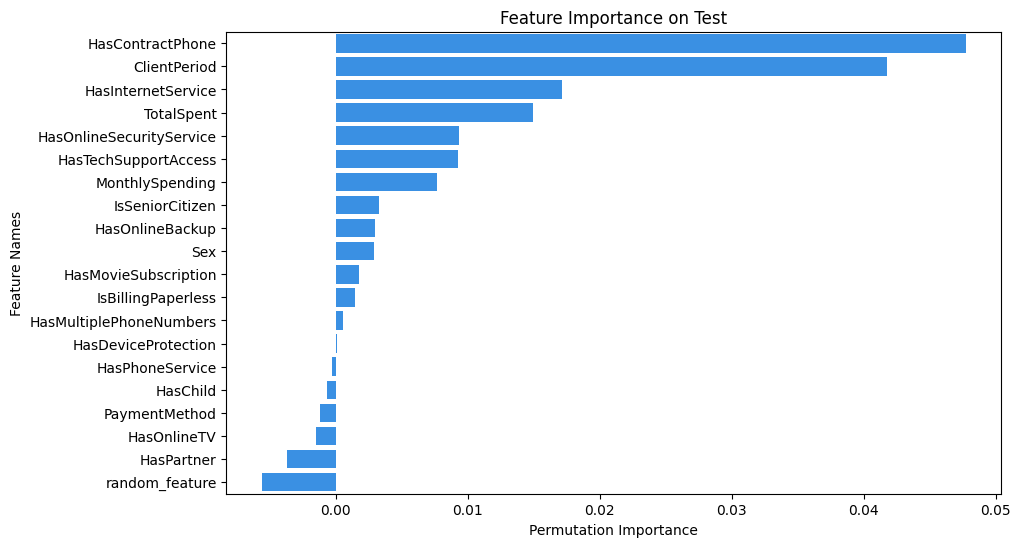

,Perm_Importance_Tr,Perm_Importance_Te
Feature,,
HasContractPhone,0.033131,0.047776
ClientPeriod,0.052939,0.041807
HasInternetService,0.009844,0.017161
TotalSpent,0.049091,0.014944
HasOnlineSecurityService,0.006695,0.009361
HasTechSupportAccess,0.006476,0.009257
MonthlySpending,0.034535,0.007685
IsSeniorCitizen,0.005377,0.003288
HasOnlineBackup,0.006168,0.002970


14 признаков после Permutation Importance


In [15]:
feats_after_permute = permutation_analysis(df=train,
                                          num_columns=num_cols,
                                          cat_columns=cat_cols,
                                          target=target_col,
                                          test_size=0.15,
                                          n_iter_permute=15, 
                                          n_jobs=-1, 
                                          metric=roc_auc_score, 
                                          higher_is_better=True
                                         )

In [16]:
# Обновляем признаки

num_cols = list(filter(lambda x: x in feats_after_permute, num_cols))
cat_cols = list(filter(lambda x: x in feats_after_permute, cat_cols))
print(len(num_cols),len(cat_cols))

# Обновление пайплайна трансформации

prep_pipe = base_pipe(
    num_columns=num_cols, 
    cat_columns=cat_cols)

3 11


In [17]:
import optuna
from optuna.samplers import TPESampler

# импортируем функции для визуализации
from optuna.visualization import plot_slice, plot_contour, plot_optimization_history

In [18]:
class CustomCatboostCV():
    def __init__(self, 
                 train: pd.DataFrame, 
                 target:str, 
                 main_estimator: object, 
                 main_fit_params: dict, 
                 main_prep_pipe: object, 
                 main_features: list):

        self.X_train = train.reset_index(drop=True).copy()
        self.y_train = train[target].reset_index(drop=True).copy()
        
        self.main_features = main_features
        self.main_estimator = main_estimator
        self.main_fit_params = main_fit_params
        self.main_prep_pipe = main_prep_pipe
        
    def _get_metric(self, y_true, y_pred):
        
        result = roc_auc_score(y_true, y_pred)
        
        return result

    def _calc_main_metric(self, X_train, X_test, y_train, y_test)-> dict:

        y_pred_train = self.main_estimator.predict(X_train)
        y_pred_test = self.main_estimator.predict(X_test)

        main_train = self._get_metric(y_true=y_train, y_pred=y_pred_train)
        main_valid = self._get_metric(y_true=y_test, y_pred=y_pred_test)

        dict_temp = {'main_train': main_train, 'main_valid': main_valid}
        
        return dict_temp
    

    def _preprocessing(self, X_tr, X_val, y_tr, y_val):

        self.main_prep_pipe.fit(X_tr, y_tr)

        X_tr = self.main_prep_pipe.transform(X_tr).reset_index(drop=True)
        X_val = self.main_prep_pipe.transform(X_val).reset_index(drop=True)
        
        y_tr = y_tr.reset_index(drop=True)
        y_val = y_val.reset_index(drop=True)

        return X_tr, X_val, y_tr, y_val

    def _model_fit(self, 
                   X_train: pd.DataFrame, 
                   y_train: pd.DataFrame, 
                   X_val=None, 
                   y_val=None):


        # если не аплифт модель, то просто применяем конвейер
        X_train_new, X_val_new, y_train, y_val = self._preprocessing(
            X_tr=X_train, X_val=X_val, y_tr=y_train, y_val=y_val)
        
        self.main_fit_params.update({'X':X_train_new, 
                                     'y':y_train, 
                                     'eval_set':[(X_train_new, y_train), (X_val_new, y_val)]
                                    })

        # Обучаем модель на трейне
        self.main_estimator.fit(**self.main_fit_params)

        print('BEST ITERATION: ', self.main_estimator.get_best_iteration())
        best_iteration = self.main_estimator.get_best_iteration()
        feature_imp = self.main_estimator.get_feature_importance(prettified=True, fstr_type='PredictionValuesChange')
        evals = self.main_estimator.get_evals_result()
        

        # формируем предсказания для тестовой выборки
        x_test_predict = self.main_estimator.predict_proba(X_val_new)[:,1]
        main_metric = self._calc_main_metric(X_train = X_train_new, X_test=X_val_new, y_train=y_train, y_test=y_val)

        return best_iteration, feature_imp, evals, main_metric

    def model_fit_cv(self, strat):
        i=0
        
        self._test_group = []

        self._best_iters = []
        self._fi = []
        self._boost_logs = {}
        self._main_scores = {}

        # убрать X_train_global

        X_train_global = self.X_train[self.main_features].reset_index(drop=True).copy()
        y_train_global = self.y_train.reset_index(drop=True).copy()

        for (train_index, test_index) in tqdm(strat.split(X_train_global, y_train_global)):
            i+=1

            print(f'==================== Обучение {i} фолда! ====================')

            X_train, X_test = X_train_global.iloc[train_index],X_train_global.iloc[test_index]
            y_train, y_test = y_train_global.iloc[train_index],y_train_global.iloc[test_index]

            # модель с контролем переобучения на последнем фолде
            best_iter, imp, evals, main_metric = self._model_fit(X_train=X_train, 
                                                                 y_train=y_train,
                                                                 X_val=X_test, 
                                                                 y_val=y_test)

            self._best_iters.append(best_iter)
            self._fi.append(imp)
            self._boost_logs[f'evals_{i}'] = evals
            self._main_scores[f'scores_{i}'] = main_metric

            print(f"ROC AUC на обучающей выборке: {main_metric['main_train']}")
            print(f"ROC AUC на проверочной выборке: {main_metric['main_valid']}")
            print()
            print(f'********************** {i} фолд обучен! ******************************')
            print()
            print()
            
        val_metrics = []
        for i in range(1, len(self._main_scores)+1):
            val_metrics.append(self._main_scores[f'scores_{i}']['main_valid']) 
        self.mean_cv_scores = np.mean(val_metrics)
        print()
        print(f"Среднее значение ROC AUC: {self.mean_cv_scores}")

    def get_fi(self)->pd.DataFrame:
        
        df_fi = self._fi[0]
        df_fi.columns = ['Feature Id', 'importance_0']

        for i in range(1, len(self._fi)):
            df1 = self._fi[i]
            df1.columns = ['Feature Id', f'importance_{i}']
            df_fi = df_fi.merge(
                df1,
                left_on = 'Feature Id',
                right_on = 'Feature Id',
                how='left')

        filter_col = [col for col in df_fi if col.startswith('importance_')]
        df_fi['mean_importance'] = df_fi[filter_col].mean(axis=1)
        df_fi = df_fi.sort_values('mean_importance', ascending=False).reset_index(drop=True)
        df_fi = df_fi.rename(columns ={'Feature Id':'index'})

        return df_fi

In [19]:
params = {'iterations':1500,
          'loss_function':'Logloss',
          'thread_count':-1,
          'random_state':42,
          'eval_metric':'AUC',
          'verbose':0
         }

fit_params = {'use_best_model':True,
              'early_stopping_rounds':150, 
              'verbose':0,
              'plot':False}

# задаем стратегию проверки
strat = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42)

In [20]:
%%time

def create_model(trial):
    
    param = {'learning_rate':trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
             'iterations':1500,
             'loss_function':'Logloss',
             'thread_count':-1,
             'random_state':42,
             'eval_metric':'AUC',
             'verbose':0,
             'depth': trial.suggest_int('depth', 1, 9),
             'subsample':trial.suggest_loguniform('subsample', 0.4, 1.0),
             'colsample_bylevel':trial.suggest_loguniform('colsample_bylevel', 0.4, 1.0),
             'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 1.0)
            }
        
    fit_params = {'early_stopping_rounds':150, 
                  'verbose':0}

    # создаем экземпляр класса XGBClassifier
    catb_model = CatBoostClassifier(**param)
    
    model = CustomCatboostCV(
        main_estimator=catb_model, 
        main_fit_params=fit_params,
        main_prep_pipe=prep_pipe,
        main_features=num_cols+cat_cols,

        train=train,
        target=target_col)
    
    return model
    
def objective(trial):
    my_model = create_model(trial)
    my_model.model_fit_cv(strat=strat)
    return my_model.mean_cv_scores

sampler = TPESampler(seed=42)

study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=15)

[I 2024-03-31 13:36:30,880] A new study created in memory with name: no-name-7ce3909a-3379-4c8e-83a4-ec61692676f5
0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.01it/s]

BEST ITERATION:  81
ROC AUC на обучающей выборке: 0.7553589876033058
ROC AUC на проверочной выборке: 0.6892224294023829

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.07it/s]

BEST ITERATION:  34
ROC AUC на обучающей выборке: 0.744852043929225
ROC AUC на проверочной выборке: 0.71849173553719

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.06it/s]
[I 2024-03-31 13:36:33,724] Trial 0 finished with value: 0.705722214759472 and parameters: {'learning_rate': 0.003148911647956862, 'depth': 9, 'subsample': 0.7822573760490122, 'colsample_bylevel': 0.6922933401417407, 'l2_leaf_reg': 1.77071686435378e-07}. Best is trial 0 with value: 0.705722214759472.


BEST ITERATION:  63
ROC AUC на обучающей выборке: 0.7414919392687849
ROC AUC на проверочной выборке: 0.7094524793388431

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.705722214759472


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.34it/s]

BEST ITERATION:  225
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.64it/s]

BEST ITERATION:  23
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.37it/s]
[I 2024-03-31 13:36:35,930] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.0004207053950287938, 'depth': 1, 'subsample': 0.8845983689917747, 'colsample_bylevel': 0.6938533737439828, 'l2_leaf_reg': 0.004619347374377372}. Best is trial 0 with value: 0.705722214759472.


BEST ITERATION:  296
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.5


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.17it/s]

BEST ITERATION:  33
ROC AUC на обучающей выборке: 0.7292097107438017
ROC AUC на проверочной выборке: 0.6847001360352754

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.33it/s]

BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.6951390681466185
ROC AUC на проверочной выборке: 0.6920196280991736

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.08s/it]
[I 2024-03-31 13:36:39,181] Trial 2 finished with value: 0.694529866281731 and parameters: {'learning_rate': 0.00012087541473056971, 'depth': 9, 'subsample': 0.8576739569300319, 'colsample_bylevel': 0.48591266506353753, 'l2_leaf_reg': 2.8483918709107956e-07}. Best is trial 0 with value: 0.705722214759472.


BEST ITERATION:  342
ROC AUC на обучающей выборке: 0.7285138833481954
ROC AUC на проверочной выборке: 0.7068698347107438

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.694529866281731


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:02,  2.77s/it]

BEST ITERATION:  1498
ROC AUC на обучающей выборке: 0.6731017561983471
ROC AUC на проверочной выборке: 0.6601580823717046

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:03,  1.49s/it]

BEST ITERATION:  127
ROC AUC на обучающей выборке: 0.6643352976721266
ROC AUC на проверочной выборке: 0.6547004132231405

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.29s/it]
[I 2024-03-31 13:36:43,061] Trial 3 finished with value: 0.6627610274572349 and parameters: {'learning_rate': 0.0005415244119402539, 'depth': 3, 'subsample': 0.6469661675743767, 'colsample_bylevel': 0.5942212735373064, 'l2_leaf_reg': 2.1371407316372935e-06}. Best is trial 0 with value: 0.705722214759472.


BEST ITERATION:  26
ROC AUC на обучающей выборке: 0.6541325180691792
ROC AUC на проверочной выборке: 0.6734245867768595

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6627610274572349


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.23it/s]

BEST ITERATION:  338
ROC AUC на обучающей выборке: 0.742058367768595
ROC AUC на проверочной выборке: 0.7173823177596398

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.28it/s]

BEST ITERATION:  345
ROC AUC на обучающей выборке: 0.7287808144037171
ROC AUC на проверочной выборке: 0.7196539256198348

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.17it/s]
[I 2024-03-31 13:36:45,635] Trial 4 finished with value: 0.7254824668014227 and parameters: {'learning_rate': 0.0280163515871626, 'depth': 2, 'subsample': 0.5227764740992744, 'colsample_bylevel': 0.5595643355000384, 'l2_leaf_reg': 4.452048365748842e-05}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  371
ROC AUC на обучающей выборке: 0.7245850835406205
ROC AUC на проверочной выборке: 0.7394111570247933

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7254824668014227


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  2.11it/s]

BEST ITERATION:  67
ROC AUC на обучающей выборке: 0.7398631198347108
ROC AUC на проверочной выборке: 0.7198347640491604

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.16it/s]

BEST ITERATION:  55
ROC AUC на обучающей выборке: 0.7233571273525133
ROC AUC на проверочной выборке: 0.7141012396694215

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.01s/it]
[I 2024-03-31 13:36:48,669] Trial 5 finished with value: 0.7234159957298855 and parameters: {'learning_rate': 0.13826232179369857, 'depth': 2, 'subsample': 0.6407586064789756, 'colsample_bylevel': 0.6883438712855351, 'l2_leaf_reg': 2.3528990899815284e-08}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  77
ROC AUC на обучающей выборке: 0.7323975835406203
ROC AUC на проверочной выборке: 0.7363119834710744

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7234159957298855


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:02,  2.25s/it]

BEST ITERATION:  618
ROC AUC на обучающей выборке: 0.7481921487603306
ROC AUC на проверочной выборке: 0.7182867764330613

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:04,  2.00s/it]

BEST ITERATION:  458
ROC AUC на обучающей выборке: 0.7265859664664194
ROC AUC на проверочной выборке: 0.7257231404958678

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:05,  1.82s/it]
[I 2024-03-31 13:36:54,145] Trial 6 finished with value: 0.7250091596374668 and parameters: {'learning_rate': 0.02692646910086179, 'depth': 2, 'subsample': 0.42456737905889963, 'colsample_bylevel': 0.9542441589365409, 'l2_leaf_reg': 0.530953226900921}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  654
ROC AUC на обучающей выборке: 0.7391119262448961
ROC AUC на проверочной выборке: 0.7310175619834711

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7250091596374668


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.83it/s]

BEST ITERATION:  66
ROC AUC на обучающей выборке: 0.7556172520661157
ROC AUC на проверочной выборке: 0.7262935078337556

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.82it/s]

BEST ITERATION:  37
ROC AUC на обучающей выборке: 0.729167277772563
ROC AUC на проверочной выборке: 0.7143595041322314

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  1.95it/s]
[I 2024-03-31 13:36:55,692] Trial 7 finished with value: 0.7242775880107009 and parameters: {'learning_rate': 0.17123375973163968, 'depth': 3, 'subsample': 0.43744920663366266, 'colsample_bylevel': 0.7487618141055226, 'l2_leaf_reg': 3.320625892007924e-05}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  27
ROC AUC на обучающей выборке: 0.7096673775050454
ROC AUC на проверочной выборке: 0.7321797520661156

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7242775880107009


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.40it/s]

BEST ITERATION:  147
ROC AUC на обучающей выборке: 0.6895015495867768
ROC AUC на проверочной выборке: 0.6711391195234073

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.13it/s]

BEST ITERATION:  247
ROC AUC на обучающей выборке: 0.6908747712019524
ROC AUC на проверочной выборке: 0.6836260330578513

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.00s/it]
[I 2024-03-31 13:36:58,718] Trial 8 finished with value: 0.6844998855711634 and parameters: {'learning_rate': 0.00030771802712506853, 'depth': 5, 'subsample': 0.41280463004086393, 'colsample_bylevel': 0.9202693545129238, 'l2_leaf_reg': 1.1755466083160747e-06}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  415
ROC AUC на обучающей выборке: 0.686935704815319
ROC AUC на проверочной выборке: 0.6987345041322315

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6844998855711634


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.32it/s]

BEST ITERATION:  250
ROC AUC на обучающей выборке: 0.7534220041322314
ROC AUC на проверочной выборке: 0.7204841565812928

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.38it/s]

BEST ITERATION:  168
ROC AUC на обучающей выборке: 0.7354951571079926
ROC AUC на проверочной выборке: 0.7181043388429753

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.39it/s]
[I 2024-03-31 13:37:00,891] Trial 9 finished with value: 0.7247516059127724 and parameters: {'learning_rate': 0.04467752817973906, 'depth': 3, 'subsample': 0.6441927965702634, 'colsample_bylevel': 0.6601123904545768, 'l2_leaf_reg': 3.0118659882617117e-07}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  135
ROC AUC на обучающей выборке: 0.732913845801849
ROC AUC на проверочной выборке: 0.7356663223140495

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7247516059127724


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.86it/s]

BEST ITERATION:  2
ROC AUC на обучающей выборке: 0.7179106404958677
ROC AUC на проверочной выборке: 0.7007253260155738

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.92it/s]

BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.7292329105458301
ROC AUC на проверочной выборке: 0.7214617768595042

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  1.72it/s]
[I 2024-03-31 13:37:02,666] Trial 10 finished with value: 0.7153674640437587 and parameters: {'learning_rate': 0.6648925113180527, 'depth': 6, 'subsample': 0.506219832153694, 'colsample_bylevel': 0.40663779362706587, 'l2_leaf_reg': 0.001320407613266518}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.7295566744497114
ROC AUC на проверочной выборке: 0.7239152892561984

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7153674640437587


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.38s/it]

BEST ITERATION:  341
ROC AUC на обучающей выборке: 0.7490315082644629
ROC AUC на проверочной выборке: 0.7104075781030116

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:02,  1.22s/it]

BEST ITERATION:  331
ROC AUC на обучающей выборке: 0.7370439438916787
ROC AUC на проверочной выборке: 0.7081611570247933

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.04s/it]
[I 2024-03-31 13:37:05,816] Trial 11 finished with value: 0.7084364792023813 and parameters: {'learning_rate': 0.011004938211129588, 'depth': 5, 'subsample': 0.5186594119408318, 'colsample_bylevel': 0.9525636585418586, 'l2_leaf_reg': 0.9255354142640315}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  19
ROC AUC на обучающей выборке: 0.6869998709344347
ROC AUC на проверочной выборке: 0.7067407024793388

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7084364792023813


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.83s/it]

BEST ITERATION:  1493
ROC AUC на обучающей выборке: 0.7373450413223142
ROC AUC на проверочной выборке: 0.7135094169246646

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:04,  2.06s/it]

BEST ITERATION:  1390
ROC AUC на обучающей выборке: 0.7229706639836673
ROC AUC на проверочной выборке: 0.7177169421487604

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:06,  2.02s/it]
[I 2024-03-31 13:37:11,891] Trial 12 finished with value: 0.720834061839902 and parameters: {'learning_rate': 0.012142464710441904, 'depth': 1, 'subsample': 0.5051622580187404, 'colsample_bylevel': 0.5228214157875922, 'l2_leaf_reg': 0.4612316680842598}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  1499
ROC AUC на обучающей выборке: 0.7254892758248462
ROC AUC на проверочной выборке: 0.731275826446281

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.720834061839902


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:02,  2.79s/it]

BEST ITERATION:  1471
ROC AUC на обучающей выборке: 0.7395402892561983
ROC AUC на проверочной выборке: 0.7120830987897552

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:05,  2.72s/it]

BEST ITERATION:  1463
ROC AUC на обучающей выборке: 0.7256146747547754
ROC AUC на проверочной выборке: 0.7108729338842976

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:06,  2.04s/it]
[I 2024-03-31 13:37:18,034] Trial 13 finished with value: 0.704260137613114 and parameters: {'learning_rate': 0.002457532745801074, 'depth': 4, 'subsample': 0.46151102925279486, 'colsample_bylevel': 0.8325443905802375, 'l2_leaf_reg': 0.018014968429693728}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  111
ROC AUC на обучающей выборке: 0.680671991599005
ROC AUC на проверочной выборке: 0.6898243801652891

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.704260137613114


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.53it/s]

BEST ITERATION:  29
ROC AUC на обучающей выборке: 0.7489669421487604
ROC AUC на проверочной выборке: 0.6921967351533915

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.55it/s]

BEST ITERATION:  4
ROC AUC на обучающей выборке: 0.6922937590932557
ROC AUC на проверочной выборке: 0.6829803719008264

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  1.63it/s]
[I 2024-03-31 13:37:19,901] Trial 14 finished with value: 0.7003000825166952 and parameters: {'learning_rate': 0.040927257184569785, 'depth': 7, 'subsample': 0.5445225527822418, 'colsample_bylevel': 0.565301412381736, 'l2_leaf_reg': 0.00019228974751454855}. Best is trial 4 with value: 0.7254824668014227.


BEST ITERATION:  25
ROC AUC на обучающей выборке: 0.7367187133336462
ROC AUC на проверочной выборке: 0.7257231404958678

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7003000825166952
CPU times: user 1min 23s, sys: 6.98 s, total: 1min 30s
Wall time: 49 s


In [21]:
params.update(study.best_params)
model = CatBoostClassifier(**params)

params

{'iterations': 1500,
 'loss_function': 'Logloss',
 'thread_count': -1,
 'random_state': 42,
 'eval_metric': 'AUC',
 'verbose': 0,
 'learning_rate': 0.0280163515871626,
 'depth': 2,
 'subsample': 0.5227764740992744,
 'colsample_bylevel': 0.5595643355000384,
 'l2_leaf_reg': 4.452048365748842e-05}

In [22]:
class CustomSelection(CustomCatboostCV):
    
    def __init__(self,
                 train:pd.DataFrame,
                 target:str, 
                 main_estimator:object, 
                 main_fit_params:dict,
                 base_pipe:object=None, 
                 num_columns:list=None, 
                 cat_columns:list=None
                 ):
        
        self.X_train = train.reset_index(drop=True).copy()
        self.y_train = train[target].reset_index(drop=True).copy()

        self.num_columns = num_columns
        self.cat_columns = cat_columns        
        self.main_features = num_columns+cat_columns
        
        self.main_estimator = main_estimator
        self.main_fit_params = main_fit_params
        self.base_pipe = base_pipe
        self.main_prep_pipe = self.base_pipe(num_columns=self.num_columns, cat_columns=self.cat_columns)
        
    def _get_score_selection(self, X, estimator, model_type, metric):

        y_predict = estimator.predict_proba(X)[:,1]

        return y_predict
        
    def backward_selection(self, strat, tol:float=0.0)->list: 
        
        self.main_features = self.num_columns+self.cat_columns
        self.main_prep_pipe = self.base_pipe(num_columns=self.num_columns, cat_columns=self.cat_columns)
        self.model_fit_cv(strat=strat)
        self.mean_metric_folds = list()
        for i in range(1,len(self._main_scores.keys())+1):
            self.mean_metric_folds.append(self._main_scores[f'scores_{i}']['main_valid'])
        self.mean_metric_folds = np.array(self.mean_metric_folds)
        mean_metric_folds = np.mean(self.mean_metric_folds)
        fi = self.get_fi()
        features_imp = fi[fi['mean_importance']>0]['index'].to_list()[::-1]
        
        bselection_res = dict()
        bselection_res['features_stack'] = None
        
        print('Средняя метрика на фолдах со всеми факторами: ',np.round(np.mean(self.mean_metric_folds),6))
        print('==========================')
        print('Конец обучения кросс-валидации!')
        print()
        
        print('Начало глубокого жадного отбора факторов Backward Selection!')
        print('==========================')

        features_to_remove = list()
        metric_mean_list = list()
        diff_metric_list = list()
        count = 1
        
        for i in notebook.tqdm(features_imp):
            print(f'Проверяемый признак: {i}')
            count = count + 1
            
            features_stack = self.X_train[features_imp].drop(features_to_remove + [i], axis=1).columns.tolist()[::-1]
            
            num_stack = list(filter(lambda x: x in self.num_columns, features_stack))
            cat_stack = list(filter(lambda x: x in self.cat_columns, features_stack))            
            
            self.main_features = num_stack+cat_stack

            self.main_prep_pipe = self.base_pipe(num_columns=num_stack,cat_columns=cat_stack)
            
            self.model_fit_cv(strat=strat)
            
            _fold_scores = list()
            for j in range(1,len(self._main_scores.keys())+1):
                _fold_scores.append(self._main_scores[f'scores_{j}']['main_valid'])
            _fold_scores = np.array(_fold_scores)
            mean_fold_scores = np.mean(_fold_scores)
            
            metric_mean_list.append(mean_fold_scores)
            print(f'Количество признаков: {len(features_stack)} => метрика: {mean_fold_scores}')
            print('Метрика модели со всеми признаками={}'.format((mean_metric_folds)))
            
            diff_metric = mean_metric_folds - mean_fold_scores
            diff_metric_list.append(diff_metric)
            
            # сравниваем разницу метрики с порогом, заданным заранее
            # если разница метрики больше или равна порогу, сохраняем
                        
            if diff_metric >= tol:
                print('Разница метрики ={}'.format(diff_metric))
                print('Сохраняем: ', i)
                print
            # если разница метрики меньше порога, удаляем
            else:
                print('Разница метрики ={}'.format(diff_metric))
                print('Удаляем: ', i)
                print

                # если разница метрики меньше порога и мы удаляем признак,
                # мы в качестве нового опорного значения метрики задаем
                # значение метрики для модели с оставшимися признаками
                mean_metric_folds = mean_fold_scores

                # добавляем удаляемый признак в список
                features_to_remove.append(i)
                  
        
        # определяем признаки, которые мы хотим сохранить (не удаляем)
        features_to_keep = [x for x in features_imp if x not in features_to_remove]
        num_stack = list(filter(lambda x: x in self.num_columns, features_to_keep))
        cat_stack = list(filter(lambda x: x in self.cat_columns, features_to_keep))
        
        bselection_res['features_stack'] = features_to_keep[::-1]
        bselection_res['features_drop'] = features_to_remove
        bselection_res['num_features_stack'] = num_stack[::-1]
        bselection_res['cat_features_stack'] = cat_stack[::-1]
        bselection_res['metric_alt'] = mean_metric_folds

        print('Общее количество признаков для сохранения: ', len(features_to_keep))
        print()    
        print('==========================')
        print(f'Конец жадного отбора факторов Backward Selection!')

        self.deep_bselection_res = bselection_res
        self.dbackward = True 
        
        return features_to_keep[::-1]    

In [23]:
f_selection = CustomSelection(train=train,
                              target=target_col,
                              main_estimator=model,
                              main_fit_params=fit_params,
                              base_pipe=base_pipe,
                              num_columns=num_cols,
                              cat_columns=cat_cols                     
                             )

feats_selected = f_selection.backward_selection(strat=strat)

0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.20it/s]

BEST ITERATION:  338
ROC AUC на обучающей выборке: 0.742058367768595
ROC AUC на проверочной выборке: 0.7173823177596398

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.12it/s]

BEST ITERATION:  345
ROC AUC на обучающей выборке: 0.7287808144037171
ROC AUC на проверочной выборке: 0.7196539256198348

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.04it/s]

BEST ITERATION:  371
ROC AUC на обучающей выборке: 0.7245850835406205
ROC AUC на проверочной выборке: 0.7394111570247933

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7254824668014227
Средняя метрика на фолдах со всеми факторами:  0.725482
Конец обучения кросс-валидации!

Начало глубокого жадного отбора факторов Backward Selection!


  0%|          | 0/14 [00:00<?, ?it/s]

Проверяемый признак: Sex



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.02it/s]

BEST ITERATION:  384
ROC AUC на обучающей выборке: 0.7441890495867768
ROC AUC на проверочной выборке: 0.7202232268505488

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.10it/s]

BEST ITERATION:  348
ROC AUC на обучающей выборке: 0.7343984664664195
ROC AUC на проверочной выборке: 0.7205578512396694

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.12it/s]


BEST ITERATION:  344
ROC AUC на обучающей выборке: 0.7241971535176233
ROC AUC на проверочной выборке: 0.7356663223140495

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7254824668014225
Количество признаков: 13 => метрика: 0.7254824668014225
Метрика модели со всеми признаками=0.7254824668014227
Разница метрики =2.220446049250313e-16
Сохраняем:  Sex
Проверяемый признак: HasDeviceProtection



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.14it/s]

BEST ITERATION:  386
ROC AUC на обучающей выборке: 0.7427685950413223
ROC AUC на проверочной выборке: 0.7217712144666478

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.05it/s]

BEST ITERATION:  365
ROC AUC на обучающей выборке: 0.735818921011874
ROC AUC на проверочной выборке: 0.7166838842975207

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.07it/s]


BEST ITERATION:  410
ROC AUC на обучающей выборке: 0.7285883160463698
ROC AUC на проверочной выборке: 0.7408316115702479

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7264289034448055
Количество признаков: 13 => метрика: 0.7264289034448055
Метрика модели со всеми признаками=0.7254824668014227
Разница метрики =-0.0009464366433827864
Удаляем:  HasDeviceProtection
Проверяемый признак: IsBillingPaperless



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.44s/it]

BEST ITERATION:  787
ROC AUC на обучающей выборке: 0.7462551652892563
ROC AUC на проверочной выборке: 0.7184143095037059

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:02,  1.04s/it]

BEST ITERATION:  325
ROC AUC на обучающей выборке: 0.7210981132961
ROC AUC на проверочной выборке: 0.7161673553719009

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.02it/s]


BEST ITERATION:  296
ROC AUC на обучающей выборке: 0.7163190207443564
ROC AUC на проверочной выборке: 0.7241735537190083

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7195850728648717
Количество признаков: 12 => метрика: 0.7195850728648717
Метрика модели со всеми признаками=0.7264289034448055
Разница метрики =0.006843830579933763
Сохраняем:  IsBillingPaperless
Проверяемый признак: HasOnlineBackup



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.37s/it]

BEST ITERATION:  626
ROC AUC на обучающей выборке: 0.7496126033057852
ROC AUC на проверочной выборке: 0.7215161483253589

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:02,  1.11s/it]

BEST ITERATION:  366
ROC AUC на обучающей выборке: 0.7285868493922185
ROC AUC на проверочной выборке: 0.725077479338843

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:03,  1.05s/it]


BEST ITERATION:  336
ROC AUC на обучающей выборке: 0.7255534419439621
ROC AUC на проверочной выборке: 0.7337293388429752

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7267743221690591
Количество признаков: 12 => метрика: 0.7267743221690591
Метрика модели со всеми признаками=0.7264289034448055
Разница метрики =-0.0003454187242536433
Удаляем:  HasOnlineBackup
Проверяемый признак: HasMultiplePhoneNumbers



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.24it/s]

BEST ITERATION:  304
ROC AUC на обучающей выборке: 0.7363119834710744
ROC AUC на проверочной выборке: 0.7123440285204992

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.25it/s]

BEST ITERATION:  363
ROC AUC на обучающей выборке: 0.723098996221899
ROC AUC на проверочной выборке: 0.7233987603305785

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.29it/s]


BEST ITERATION:  275
ROC AUC на обучающей выборке: 0.7265203336931525
ROC AUC на проверочной выборке: 0.7298553719008264

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7218660535839679
Количество признаков: 11 => метрика: 0.7218660535839679
Метрика модели со всеми признаками=0.7267743221690591
Разница метрики =0.004908268585091191
Сохраняем:  HasMultiplePhoneNumbers
Проверяемый признак: IsSeniorCitizen



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.14it/s]

BEST ITERATION:  343
ROC AUC на обучающей выборке: 0.7320506198347108
ROC AUC на проверочной выборке: 0.7124715615911436

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.08it/s]

BEST ITERATION:  373
ROC AUC на обучающей выборке: 0.7287808144037171
ROC AUC на проверочной выборке: 0.7239152892561983

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.03it/s]


BEST ITERATION:  536
ROC AUC на обучающей выборке: 0.7286524821654855
ROC AUC на проверочной выборке: 0.7448347107438017

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7270738538637146
Количество признаков: 11 => метрика: 0.7270738538637146
Метрика модели со всеми признаками=0.7267743221690591
Разница метрики =-0.0002995316946554638
Удаляем:  IsSeniorCitizen
Проверяемый признак: HasMovieSubscription



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.26it/s]

BEST ITERATION:  363
ROC AUC на обучающей выборке: 0.7318569214876034
ROC AUC на проверочной выборке: 0.7070506731400694

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.24it/s]

BEST ITERATION:  314
ROC AUC на обучающей выборке: 0.7185780348007698
ROC AUC на проверочной выборке: 0.7045454545454546

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.12it/s]


BEST ITERATION:  497
ROC AUC на обучающей выборке: 0.7291687444267143
ROC AUC на проверочной выборке: 0.7423811983471074

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7179924420108771
Количество признаков: 10 => метрика: 0.7179924420108771
Метрика модели со всеми признаками=0.7270738538637146
Разница метрики =0.009081411852837507
Сохраняем:  HasMovieSubscription
Проверяемый признак: HasTechSupportAccess



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.16it/s]

BEST ITERATION:  372
ROC AUC на обучающей выборке: 0.7334710743801653
ROC AUC на проверочной выборке: 0.7119555657191107

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.11it/s]

BEST ITERATION:  320
ROC AUC на обучающей выборке: 0.7229050312104004
ROC AUC на проверочной выборке: 0.7099690082644629

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.08it/s]


BEST ITERATION:  332
ROC AUC на обучающей выборке: 0.7199343232271084
ROC AUC на проверочной выборке: 0.7399276859504131

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7206174199779957
Количество признаков: 10 => метрика: 0.7206174199779957
Метрика модели со всеми признаками=0.7270738538637146
Разница метрики =0.006456433885718926
Сохраняем:  HasTechSupportAccess
Проверяемый признак: HasOnlineSecurityService



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.12s/it]

BEST ITERATION:  404
ROC AUC на обучающей выборке: 0.7326962809917357
ROC AUC на проверочной выборке: 0.7104075781030116

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.04it/s]

BEST ITERATION:  284
ROC AUC на обучающей выборке: 0.7085706868634721
ROC AUC на проверочной выборке: 0.7119059917355371

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:03,  1.03s/it]


BEST ITERATION:  345
ROC AUC на обучающей выборке: 0.7232914945792462
ROC AUC на проверочной выборке: 0.7311466942148761

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7178200880178083
Количество признаков: 10 => метрика: 0.7178200880178083
Метрика модели со всеми признаками=0.7270738538637146
Разница метрики =0.009253765845906314
Сохраняем:  HasOnlineSecurityService
Проверяемый признак: HasInternetService



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.46s/it]

BEST ITERATION:  379
ROC AUC на обучающей выборке: 0.7372804752066114
ROC AUC на проверочной выборке: 0.7027893095037059

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:02,  1.23s/it]

BEST ITERATION:  370
ROC AUC на обучающей выборке: 0.7254878091706951
ROC AUC на проверочной выборке: 0.7215909090909091

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:03,  1.16s/it]


BEST ITERATION:  339
ROC AUC на обучающей выборке: 0.7242613196367391
ROC AUC на проверочной выборке: 0.7401859504132232

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.721522056335946
Количество признаков: 10 => метрика: 0.721522056335946
Метрика модели со всеми признаками=0.7270738538637146
Разница метрики =0.005551797527768576
Сохраняем:  HasInternetService
Проверяемый признак: TotalSpent



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.15s/it]

BEST ITERATION:  502
ROC AUC на обучающей выборке: 0.7392820247933884
ROC AUC на проверочной выборке: 0.7145414086687307

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:02,  1.18s/it]

BEST ITERATION:  442
ROC AUC на обучающей выборке: 0.7376914716994415
ROC AUC на проверочной выборке: 0.7230113636363636

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:03,  1.12s/it]


BEST ITERATION:  308
ROC AUC на обучающей выборке: 0.7274259926315295
ROC AUC на проверочной выборке: 0.7443181818181818

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.727290318041092
Количество признаков: 10 => метрика: 0.727290318041092
Метрика модели со всеми признаками=0.7270738538637146
Разница метрики =-0.00021646417737741785
Удаляем:  TotalSpent
Проверяемый признак: MonthlySpending



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:01,  1.23s/it]

BEST ITERATION:  552
ROC AUC на обучающей выборке: 0.7383780991735537
ROC AUC на проверочной выборке: 0.7211276855239703

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:02,  1.13s/it]

BEST ITERATION:  287
ROC AUC на обучающей выборке: 0.7284585171539869
ROC AUC на проверочной выборке: 0.712293388429752

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:03,  1.15s/it]


BEST ITERATION:  400
ROC AUC на обучающей выборке: 0.7233585940066644
ROC AUC на проверочной выборке: 0.7379907024793388

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.723803925477687
Количество признаков: 9 => метрика: 0.723803925477687
Метрика модели со всеми признаками=0.727290318041092
Разница метрики =0.003486392563404994
Сохраняем:  MonthlySpending
Проверяемый признак: ClientPeriod



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.62it/s]

BEST ITERATION:  92
ROC AUC на обучающей выборке: 0.702995867768595
ROC AUC на проверочной выборке: 0.6893675532413922

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.69it/s]

BEST ITERATION:  79
ROC AUC на обучающей выборке: 0.7001209256347679
ROC AUC на проверочной выборке: 0.6951188016528925

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:01,  1.79it/s]


BEST ITERATION:  24
ROC AUC на обучающей выборке: 0.6922427928615009
ROC AUC на проверочной выборке: 0.7108729338842974

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6984530962595273
Количество признаков: 9 => метрика: 0.6984530962595273
Метрика модели со всеми признаками=0.727290318041092
Разница метрики =0.02883722178156467
Сохраняем:  ClientPeriod
Проверяемый признак: HasContractPhone



0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================



1it [00:00,  1.02it/s]

BEST ITERATION:  489
ROC AUC на обучающей выборке: 0.726175103305785
ROC AUC на проверочной выборке: 0.7021399169715733

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================



2it [00:01,  1.23it/s]

BEST ITERATION:  301
ROC AUC на обучающей выборке: 0.7107013686816539
ROC AUC на проверочной выборке: 0.6987345041322315

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================



3it [00:02,  1.21it/s]

BEST ITERATION:  374
ROC AUC на обучающей выборке: 0.7175469769324634
ROC AUC на проверочной выборке: 0.7359245867768595

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7122663359602214
Количество признаков: 9 => метрика: 0.7122663359602214
Метрика модели со всеми признаками=0.727290318041092
Разница метрики =0.015023982080870635
Сохраняем:  HasContractPhone
Общее количество признаков для сохранения:  10

Конец жадного отбора факторов Backward Selection!


In [24]:
# Обновляем признаки

num_cols = list(filter(lambda x: x in feats_selected, num_cols))
cat_cols = list(filter(lambda x: x in feats_selected, cat_cols))
print(len(num_cols),len(cat_cols))

# Обновление пайплайна трансформации

prep_pipe = base_pipe(
    num_columns=num_cols, 
    cat_columns=cat_cols)

2 8


In [25]:
%%time

def create_model(trial):
    
    param = {'learning_rate':trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
             'iterations':1500,
             'loss_function':'Logloss',
             'thread_count':-1,
             'random_state':42,
             'eval_metric':'AUC',
             'verbose':0,
             'depth': trial.suggest_int('depth', 1, 9),
             'subsample':trial.suggest_loguniform('subsample', 0.4, 1.0),
             'colsample_bylevel':trial.suggest_loguniform('colsample_bylevel', 0.4, 1.0),
             'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 1.0)
            }
        
    fit_params = {'early_stopping_rounds':150, 
                  'verbose':0}

    # создаем экземпляр класса XGBClassifier
    catb_model = CatBoostClassifier(**param)
    
    model = CustomCatboostCV(
        main_estimator=catb_model, 
        main_fit_params=fit_params,
        main_prep_pipe=prep_pipe,
        main_features=num_cols+cat_cols,

        train=train,
        target=target_col)
    
    return model
    
def objective(trial):
    my_model = create_model(trial)
    my_model.model_fit_cv(strat=strat)
    return my_model.mean_cv_scores

sampler = TPESampler(seed=42)

study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=15)

[I 2024-03-31 13:38:02,952] A new study created in memory with name: no-name-46c4e7a1-0424-4f13-bb56-c32497b926a0
0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.53it/s]

BEST ITERATION:  2
ROC AUC на обучающей выборке: 0.7216554752066117
ROC AUC на проверочной выборке: 0.692840264096069

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.42it/s]

BEST ITERATION:  28
ROC AUC на обучающей выборке: 0.7286495488571831
ROC AUC на проверочной выборке: 0.7100981404958678

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.44it/s]
[I 2024-03-31 13:38:05,052] Trial 0 finished with value: 0.7076168648915271 and parameters: {'learning_rate': 0.003148911647956862, 'depth': 9, 'subsample': 0.7822573760490122, 'colsample_bylevel': 0.6922933401417407, 'l2_leaf_reg': 1.77071686435378e-07}. Best is trial 0 with value: 0.7076168648915271.


BEST ITERATION:  17
ROC AUC на обучающей выборке: 0.7201253549303046
ROC AUC на проверочной выборке: 0.7199121900826446

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7076168648915271


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.41it/s]

BEST ITERATION:  234
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.70it/s]

BEST ITERATION:  117
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.01s/it]
[I 2024-03-31 13:38:08,101] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.0004207053950287938, 'depth': 1, 'subsample': 0.8845983689917747, 'colsample_bylevel': 0.6938533737439828, 'l2_leaf_reg': 0.004619347374377372}. Best is trial 0 with value: 0.7076168648915271.


BEST ITERATION:  1223
ROC AUC на обучающей выборке: 0.5
ROC AUC на проверочной выборке: 0.5

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.5


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.29s/it]

BEST ITERATION:  333
ROC AUC на обучающей выборке: 0.7156508264462811
ROC AUC на проверочной выборке: 0.6729480368702505

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:02,  1.04it/s]

BEST ITERATION:  96
ROC AUC на обучающей выборке: 0.7123770210494204
ROC AUC на проверочной выборке: 0.6922778925619836

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.13it/s]
[I 2024-03-31 13:38:10,770] Trial 2 finished with value: 0.6952182161468329 and parameters: {'learning_rate': 0.00012087541473056971, 'depth': 9, 'subsample': 0.8576739569300319, 'colsample_bylevel': 0.48591266506353753, 'l2_leaf_reg': 2.8483918709107956e-07}. Best is trial 0 with value: 0.7076168648915271.


BEST ITERATION:  59
ROC AUC на обучающей выборке: 0.7213518444642606
ROC AUC на проверочной выборке: 0.7204287190082643

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6952182161468329


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:02,  2.06s/it]

BEST ITERATION:  1496
ROC AUC на обучающей выборке: 0.6759426652892561
ROC AUC на проверочной выборке: 0.6649354418801015

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:02,  1.16s/it]

BEST ITERATION:  155
ROC AUC на обучающей выборке: 0.6675641367860328
ROC AUC на проверочной выборке: 0.6650309917355371

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:03,  1.02s/it]
[I 2024-03-31 13:38:13,839] Trial 3 finished with value: 0.6649991417837252 and parameters: {'learning_rate': 0.0005415244119402539, 'depth': 3, 'subsample': 0.6469661675743767, 'colsample_bylevel': 0.5942212735373064, 'l2_leaf_reg': 2.1371407316372935e-06}. Best is trial 0 with value: 0.7076168648915271.


BEST ITERATION:  109
ROC AUC на обучающей выборке: 0.6526449640963063
ROC AUC на проверочной выборке: 0.6650309917355371

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6649991417837252


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.03it/s]

BEST ITERATION:  408
ROC AUC на обучающей выборке: 0.7408316115702479
ROC AUC на проверочной выборке: 0.7138920161365981

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.03it/s]

BEST ITERATION:  364
ROC AUC на обучающей выборке: 0.7314292251372788
ROC AUC на проверочной выборке: 0.7192665289256199

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.09it/s]
[I 2024-03-31 13:38:16,619] Trial 4 finished with value: 0.7256964433953951 and parameters: {'learning_rate': 0.0280163515871626, 'depth': 2, 'subsample': 0.5227764740992744, 'colsample_bylevel': 0.5595643355000384, 'l2_leaf_reg': 4.452048365748842e-05}. Best is trial 4 with value: 0.7256964433953951.


BEST ITERATION:  379
ROC AUC на обучающей выборке: 0.7271678615009152
ROC AUC на проверочной выборке: 0.7439307851239669

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7256964433953951


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  2.02it/s]

BEST ITERATION:  77
ROC AUC на обучающей выборке: 0.7403150826446282
ROC AUC на проверочной выборке: 0.720478292991838

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:00,  2.13it/s]

BEST ITERATION:  68
ROC AUC на обучающей выборке: 0.734204501454921
ROC AUC на проверочной выборке: 0.7178460743801652

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  2.16it/s]
[I 2024-03-31 13:38:18,019] Trial 5 finished with value: 0.7255244447713839 and parameters: {'learning_rate': 0.13826232179369857, 'depth': 2, 'subsample': 0.6407586064789756, 'colsample_bylevel': 0.6883438712855351, 'l2_leaf_reg': 2.3528990899815284e-08}. Best is trial 4 with value: 0.7256964433953951.


BEST ITERATION:  53
ROC AUC на обучающей выборке: 0.7158683912563946
ROC AUC на проверочной выборке: 0.7382489669421488

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7255244447713839


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.02it/s]

BEST ITERATION:  467
ROC AUC на обучающей выборке: 0.7408961776859503
ROC AUC на проверочной выборке: 0.7203507599211934

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:02,  1.02s/it]

BEST ITERATION:  533
ROC AUC на обучающей выборке: 0.7337524053128079
ROC AUC на проверочной выборке: 0.7196539256198348

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.05it/s]
[I 2024-03-31 13:38:20,902] Trial 6 finished with value: 0.7266871679076154 and parameters: {'learning_rate': 0.02692646910086179, 'depth': 2, 'subsample': 0.42456737905889963, 'colsample_bylevel': 0.9542441589365409, 'l2_leaf_reg': 0.530953226900921}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  390
ROC AUC на обучающей выборке: 0.7269738964894167
ROC AUC на проверочной выборке: 0.7400568181818182

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7266871679076154


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.86it/s]

BEST ITERATION:  67
ROC AUC на обучающей выборке: 0.7472236570247934
ROC AUC на проверочной выборке: 0.713120954123276

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:00,  2.09it/s]

BEST ITERATION:  28
ROC AUC на обучающей выборке: 0.7161235890787065
ROC AUC на проверочной выборке: 0.6974431818181818

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  2.15it/s]
[I 2024-03-31 13:38:22,326] Trial 7 finished with value: 0.7170027836058303 and parameters: {'learning_rate': 0.17123375973163968, 'depth': 3, 'subsample': 0.43744920663366266, 'colsample_bylevel': 0.7487618141055226, 'l2_leaf_reg': 3.320625892007924e-05}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  24
ROC AUC на обучающей выборке: 0.722324602830056
ROC AUC на проверочной выборке: 0.7404442148760331

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7170027836058303


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.54it/s]

BEST ITERATION:  112
ROC AUC на обучающей выборке: 0.6956998966942148
ROC AUC на проверочной выборке: 0.6725595740688619

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.32it/s]

BEST ITERATION:  244
ROC AUC на обучающей выборке: 0.6905524739522222
ROC AUC на проверочной выборке: 0.6862086776859504

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.30it/s]
[I 2024-03-31 13:38:24,656] Trial 8 finished with value: 0.6863507808879677 and parameters: {'learning_rate': 0.00030771802712506853, 'depth': 5, 'subsample': 0.41280463004086393, 'colsample_bylevel': 0.9202693545129238, 'l2_leaf_reg': 1.1755466083160747e-06}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  217
ROC AUC на обучающей выборке: 0.6897124477871123
ROC AUC на проверочной выборке: 0.7002840909090909

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.6863507808879677


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.56it/s]

BEST ITERATION:  161
ROC AUC на обучающей выборке: 0.7438016528925621
ROC AUC на проверочной выборке: 0.7132484871939205

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.72it/s]

BEST ITERATION:  95
ROC AUC на обучающей выборке: 0.7143808372835218
ROC AUC на проверочной выборке: 0.7018336776859503

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  1.67it/s]
[I 2024-03-31 13:38:26,466] Trial 9 finished with value: 0.7210914378800671 and parameters: {'learning_rate': 0.04467752817973906, 'depth': 3, 'subsample': 0.6441927965702634, 'colsample_bylevel': 0.6601123904545768, 'l2_leaf_reg': 3.0118659882617117e-07}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  160
ROC AUC на обучающей выборке: 0.7311710940066645
ROC AUC на проверочной выборке: 0.7481921487603306

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7210914378800671


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.95it/s]

BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.7426394628099173
ROC AUC на проверочной выборке: 0.6953044375644996

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:00,  2.16it/s]

BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.7415007391936921
ROC AUC на проверочной выборке: 0.7160382231404958

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:01,  2.14it/s]
[I 2024-03-31 13:38:27,901] Trial 10 finished with value: 0.719801892411307 and parameters: {'learning_rate': 0.6607883189474447, 'depth': 6, 'subsample': 0.5045288705958699, 'colsample_bylevel': 0.9597327896058049, 'l2_leaf_reg': 0.7433098422141448}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  3
ROC AUC на обучающей выборке: 0.7285883160463698
ROC AUC на проверочной выборке: 0.7480630165289256

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.719801892411307


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  1.08it/s]

BEST ITERATION:  325
ROC AUC на обучающей выборке: 0.7489023760330579
ROC AUC на проверочной выборке: 0.7096306525002345

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.18it/s]

BEST ITERATION:  266
ROC AUC на обучающей выборке: 0.7267128320504999
ROC AUC на проверочной выборке: 0.7019628099173555

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.13it/s]
[I 2024-03-31 13:38:30,590] Trial 11 finished with value: 0.7180345976653674 and parameters: {'learning_rate': 0.011004938211129588, 'depth': 5, 'subsample': 0.5186594119408318, 'colsample_bylevel': 0.4297119367453282, 'l2_leaf_reg': 0.004170982973983112}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  340
ROC AUC на обучающей выборке: 0.7383360661989018
ROC AUC на проверочной выборке: 0.7425103305785123

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7180345976653674


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.84s/it]

BEST ITERATION:  1497
ROC AUC на обучающей выборке: 0.7306947314049587
ROC AUC на проверочной выборке: 0.7155734004127967

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:03,  1.83s/it]

BEST ITERATION:  1369
ROC AUC на обучающей выборке: 0.7260055380860749
ROC AUC на проверочной выборке: 0.715392561983471

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:05,  1.84s/it]
[I 2024-03-31 13:38:36,150] Trial 12 finished with value: 0.7261708166665244 and parameters: {'learning_rate': 0.012142464710441904, 'depth': 1, 'subsample': 0.5067576074387837, 'colsample_bylevel': 0.5228214157875922, 'l2_leaf_reg': 0.4612316680842598}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  1355
ROC AUC на обучающей выборке: 0.7254251097057305
ROC AUC на проверочной выборке: 0.7475464876033057

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.7261708166665244


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.03s/it]

BEST ITERATION:  560
ROC AUC на обучающей выборке: 0.5978822314049587
ROC AUC на проверочной выборке: 0.5999595412327611

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:02,  1.50s/it]

BEST ITERATION:  1494
ROC AUC на обучающей выборке: 0.6768612574506032
ROC AUC на проверочной выборке: 0.6636105371900827

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:04,  1.57s/it]
[I 2024-03-31 13:38:40,907] Trial 13 finished with value: 0.645837064708441 and parameters: {'learning_rate': 0.002674276270628787, 'depth': 1, 'subsample': 0.4629409760626914, 'colsample_bylevel': 0.5108653194480437, 'l2_leaf_reg': 0.5769883659045825}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  1284
ROC AUC на обучающей выборке: 0.654518981438025
ROC AUC на проверочной выборке: 0.6739411157024794

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.645837064708441


0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:01,  1.22s/it]

BEST ITERATION:  371
ROC AUC на обучающей выборке: 0.7577479338842975
ROC AUC на проверочной выборке: 0.7033053053757389

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:01,  1.24it/s]

BEST ITERATION:  21
ROC AUC на обучающей выборке: 0.7077277273900595
ROC AUC на проверочной выборке: 0.6944731404958677

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


3it [00:02,  1.26it/s]
[I 2024-03-31 13:38:43,340] Trial 14 finished with value: 0.702840749174833 and parameters: {'learning_rate': 0.005207039941415477, 'depth': 7, 'subsample': 0.5590746419113533, 'colsample_bylevel': 0.8245642508446496, 'l2_leaf_reg': 0.03120545224146421}. Best is trial 6 with value: 0.7266871679076154.


BEST ITERATION:  79
ROC AUC на обучающей выборке: 0.7084379546627868
ROC AUC на проверочной выборке: 0.7107438016528925

********************** 3 фолд обучен! ******************************



Среднее значение ROC AUC: 0.702840749174833
CPU times: user 1min 20s, sys: 6.46 s, total: 1min 27s
Wall time: 40.4 s


In [26]:
params.update(study.best_params)
params['iterations'] = int(np.mean([467,533,390])/0.85)
model = CatBoostClassifier(**params)

params

{'iterations': 545,
 'loss_function': 'Logloss',
 'thread_count': -1,
 'random_state': 42,
 'eval_metric': 'AUC',
 'verbose': 0,
 'learning_rate': 0.02692646910086179,
 'depth': 2,
 'subsample': 0.42456737905889963,
 'colsample_bylevel': 0.9542441589365409,
 'l2_leaf_reg': 0.530953226900921}

In [27]:
class FinalModel():

    def __init__(self,
                 base_pipe: object=None,
                 num_columns: list=None,
                 cat_columns: list=None,
                 estimator:object=None):


        self.num_columns = num_columns
        self.cat_columns = cat_columns
        self.features = self.num_columns+self.cat_columns
        self.base_pipe = base_pipe
        self.estimator = estimator

    def fit(self, train: pd.DataFrame, target:str):
        
        X_train = train.reset_index(drop=True)
        y_train = train[target_col].reset_index(drop=True)


        prep_pipe = self.base_pipe(
            num_columns=self.num_columns,
            cat_columns=self.cat_columns)

        self.prep_pipe = prep_pipe.fit(X_train[self.features],y_train)

        self.estimator.fit(self.prep_pipe.transform(X_train[self.features]),y_train)

        return 'Пайплайн и модель обучены!'

    def predict(self, X: pd.DataFrame):

        predict = self.estimator.predict_proba(self.prep_pipe.transform(X[self.features]))[:, 1]

        return predict

In [28]:
final_model = FinalModel(base_pipe=base_pipe,
                         num_columns=num_cols,
                         cat_columns=cat_cols,
                         estimator=model
                        )

In [29]:
final_model.fit(train=train,target=target_col)

'Пайплайн и модель обучены!'

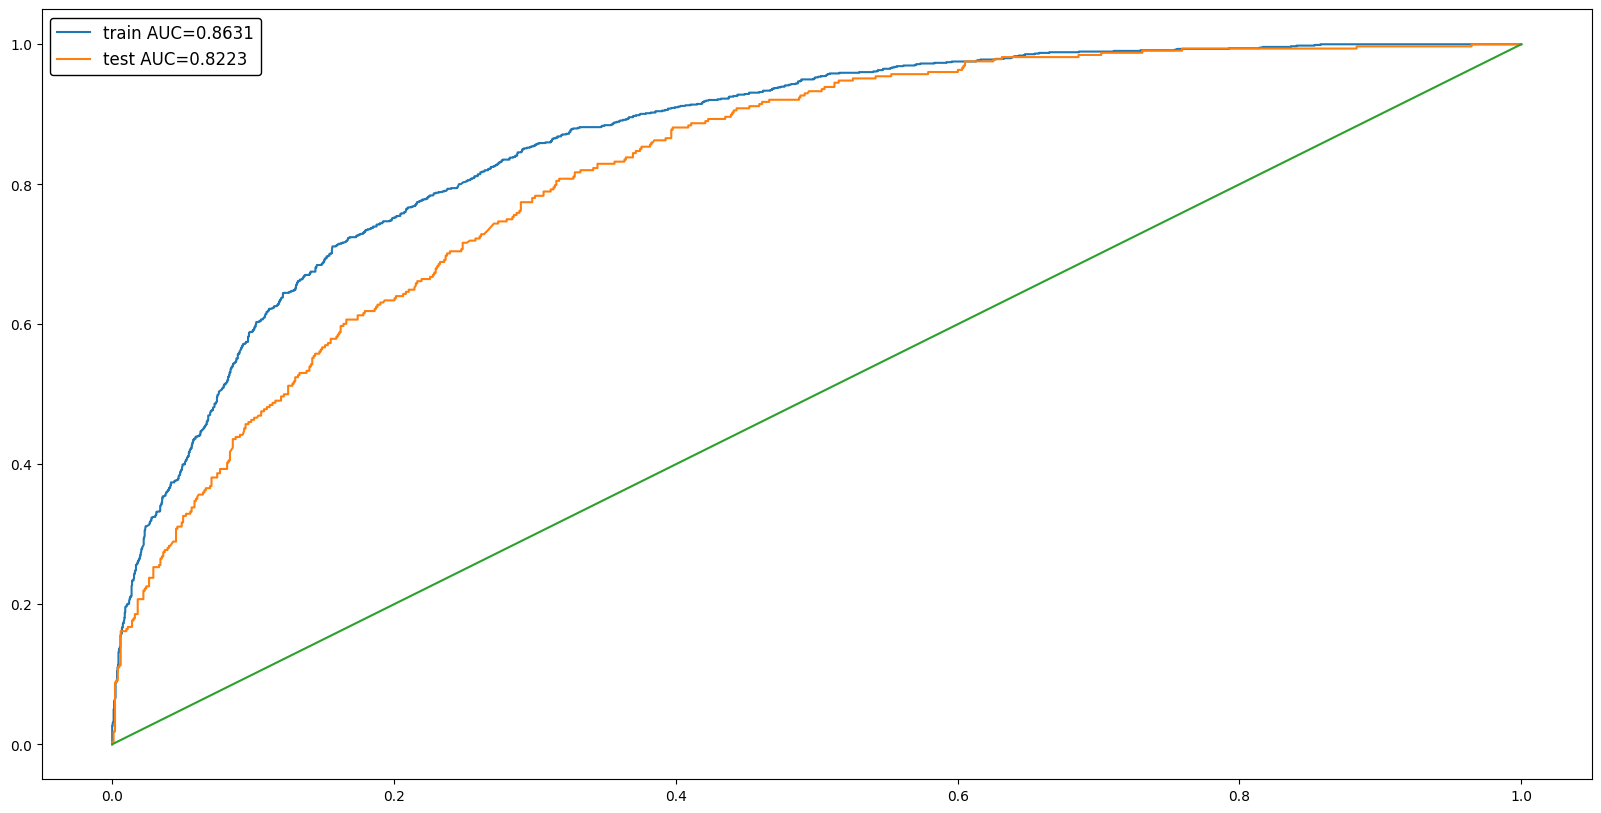

In [30]:
# Рассчитаем ROC-AUC и отрисуем ROC curve обученной модели

from sklearn.metrics import roc_curve

y_train_predicted = final_model.predict(train)
y_valid_predicted = final_model.predict(valid)

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [31]:
final_model.fit(train=data,target=target_col)

'Пайплайн и модель обучены!'

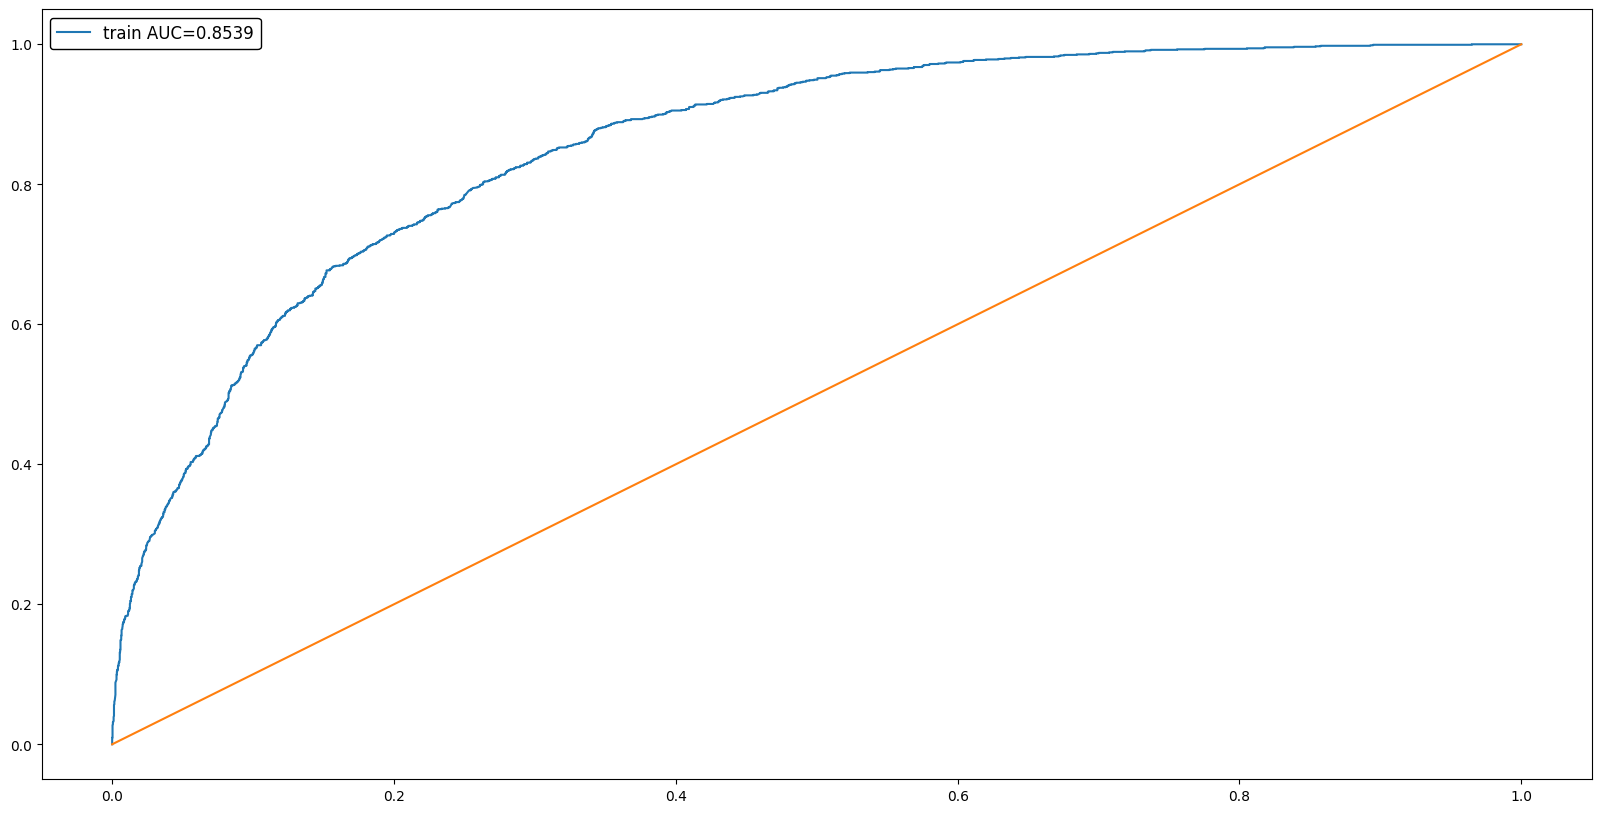

In [32]:
y_predicted = final_model.predict(data)
train_auc = roc_auc_score(data[target_col], y_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(data[target_col], y_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [33]:
X_test = pd.read_csv('./test.csv')
print(X_test.shape)
X_test.head()

(1761, 19)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [34]:
submission = pd.read_csv('./submission.csv')
print(submission.shape)
submission.head()

(1761, 2)


,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [35]:
# Преобразование

X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: np.nan if x == ' ' else np.float(x))
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(data['TotalSpent'].median())

In [36]:
# Применение

submission['Churn'] = final_model.predict(X_test)
submission.to_csv('./my_submission_custom_CV.csv',index=False)

Лучшее решение отправьте в Stepik.

In [37]:
pd.read_csv('my_submission_custom_CV.csv')

,Id,Churn
0,0,0.047084
1,1,0.584847
2,2,0.634647
3,3,0.013668
4,4,0.005403
...,...,...
1756,1756,0.120430
1757,1757,0.016352
1758,1758,0.790593
1759,1759,0.588424
